<a href="https://colab.research.google.com/github/SergitoPrece/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "María", "Pedro", "Laura", "Carlos", "Ana", "Luis", "Sofia", "Diego", "Martina"]
  apellidos = ["Gómez", "Pérez", "Rodríguez", "Fernández", "López", "González", "Martínez", "Sánchez", "Ramírez", "Díaz"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Función para generar un DNI aleatorio
def generar_dni():
  return random.randint(10000000, 50000000)

# Crear una lista para almacenar los datos
data = []

# Generar 100 filas de datos
for i in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = random.randint(1, 10)
  nota_2do_trimestre = random.randint(1, 10)
  nota_3er_trimestre = random.randint(1, 10)
  faltas = random.randint(0, 15)

  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Apellido y Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Carlos Díaz,41490410,Química,9,2,4,11
1,Diego Pérez,26052799,Biología,7,7,4,8
2,Diego Rodríguez,11775124,Química,4,5,6,5
3,Juan Díaz,16599777,Historia,1,9,9,3
4,Laura López,27249516,Química,1,6,5,15
...,...,...,...,...,...,...,...
95,Ana Gómez,28076433,Música,1,8,9,14
96,Pedro Díaz,20949204,Ciencias Naturales,3,10,6,9
97,Laura Gómez,14493282,Educación Física,3,2,9,1
98,Diego Martínez,18598114,Inglés,10,5,9,3


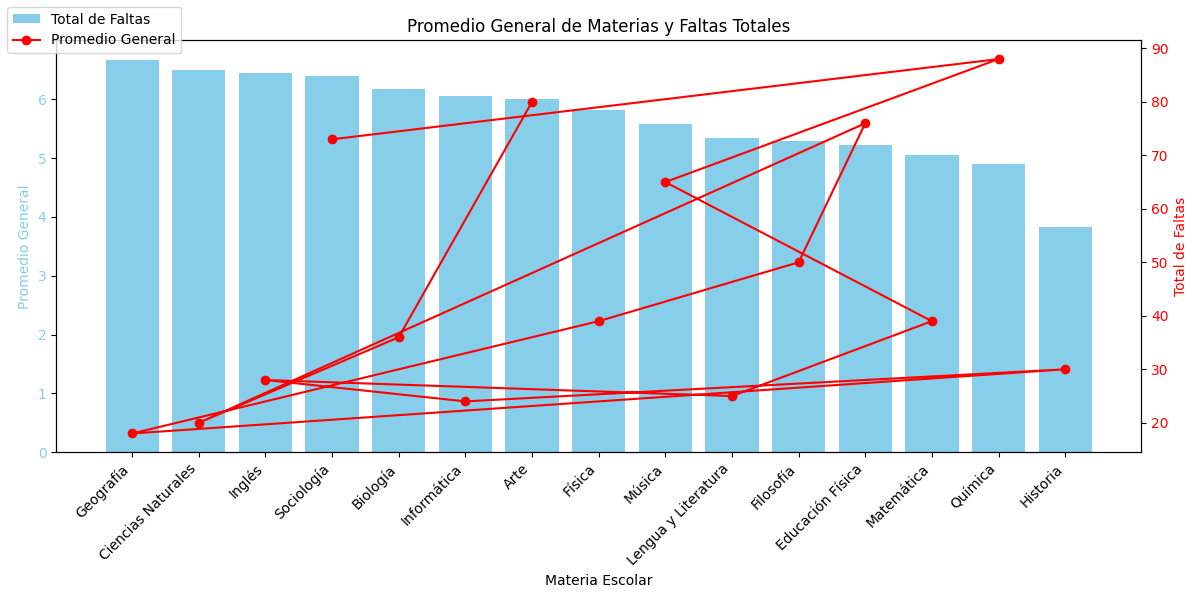

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras para el promedio general
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values, color='skyblue')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')
plt.xticks(rotation=45, ha='right')

# Crear el segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Agregar leyenda
fig.legend(['Total de Faltas', 'Promedio General'], loc='upper left')

# Ajustar el espacio entre las etiquetas del eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)